## INF-285 
#Tarea 2: SVD y PCA

# Instrucciones
* La tarea es individual.
* Las consultas sobre las tareas se deben realizar por medio de la plataforma Aula.
* La tarea debe ser realizada en Jupyter Notebook (Python 3).
* Se evaluará la correcta utilización de librerias ```NumPy```, ```SciPy```, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
* El archivo de entrega debe denominarse **ROL-tarea-numero.ipynb**. De no respetarse este formato existirá un descuento de 50 puntos
* La fecha de entrega es el viernes 29 de Mayo a las 18:00 hrs. Se aceptarán entregas hasta las 19:00 hrs sin descuento en caso de existir algun problema, posteriormente existirá un descuento lineal hasta las 20:00 hrs del mismo día.
* Las tareas que sean entregadas antes del jueves a mediodía recibirán una bonificación de 10 puntos.
* Se limitará el uso de librerias a solo las que estan agregadas en el Notebook (No se permite usar sklearn)
* Debe seguir la firma de las funciones que se indican en la tarea, en caso contrario se considerará incorrecta
* Debe citar cualquier código ajeno utilizado (incluso si proviene de los Jupyter Notebooks del curso).

# Introducción

La compresión de Imágenes utilizando *SVD* se basa en que  la matriz $\Sigma$ representa los valores singulares de la matriz original, entonces se puede obtener una aproximación de la imagen original minimizando el rango de la matriz al eliminar los  valores singulares de menor valor, ya que estos representan una "menor información" de la imagen. De este forma, por ejemplo si $\Sigma$ es de tamaño $n\times n$, se pueden omitir los $\sigma$ menos significativos obteniendo $\tilde{\Sigma}$ de tamaño $m\times m$, $m<n$.

Por otro lado, también se puede utilizar el análisis de componentes principales (PCA) para la compresión de imágenes al reducir la dimensión de la matriz de la imagen y proyectar esas nuevas dimensiones en una nueva imagen reteniendo la información importante de la imagen original

En esta tarea se busca comprimir un archivo *GIF*, el cual consiste de una secuencia de multiples imagenes, utilizando *SVD* y *PCA* para poder comparar ambos métodos y analizar la relación entre ambos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence

In [2]:
def plotAnimation(animation):
    """
    Parameters
    ----------
    animimation         : (frames, rows, cols) array
                          GIF array

    Returns
    -------
    Animation plots      : None
    """
    for frame in animation:
        plt.imshow(frame, cmap=plt.cm.gray)
        plt.axis('off')
        plt.show()

In [3]:
def gifToArray(gif_file):
    """
    Parameters
    ----------
    gif_file             : string
                          GIF path

    Returns
    -------
    data                 : (frames, rows, cols) array
                          NumPy array with GIF pixel values
    """
    im = Image.open(gif_file)
    data = list()
    for frame in ImageSequence.Iterator(im):
        tmp = np.array(im.convert('L'))
        data.append(tmp)
    data = np.array(data)
    return data



Podemos considerar un *GIF* como una colección de $p$ *frames*, donde un *frame* es una martriz $F\in\mathbb{R}^{r\times c}$ con $r$ el número de filas y $c$ en número de columnas de esta imagen. Ahora, si $(f_k)_{i,j}$ corresponde al elemento $i,j$ del $k$-ésimo *frame*, vamos a definir $\mathbf{f}_{i,j}=\langle (f_1)_{i,j}, (f_2)_{i,j},\dots,(f_p)_{i,j}\rangle$,
es decir, este vector corresponde a los valores de los $p$ frames de la coordenada $(i,j)$ del *GIF*.

Finalmente, para trabajar con los algoritmos, vamos a construir la matriz $G \in \mathbb{R}^{q\times p}$, donde $q=r\times c$ de cada *frame*, y que se define como:

\begin{equation}
    G = 
    \left[
    \begin{array}{c}
        \mathbf{f}_{1,1} \\ \hline
        \mathbf{f}_{1,2} \\ \hline
        \dots \\ \hline
        \mathbf{f}_{r,c}
    \end{array}
    \right]
\end{equation}

----
## Funciones a Implementar

1. Crear la función ```createG(data)``` que recibe ```data``` el arreglo ```NumPy``` con la información del GIF, y retorna el arreglo $G$ definido anteriormente. (10 puntos)

In [4]:
def createG(data):
    """
    Parameters
    ----------
    data             : (frames, rows, cols) array
                       NumPy array with GIF pixel values

    G                : (q, p) array
                       G matrix
    """
    
    """s=0
    matrices=data
    #print(matrices[0])
    for matriz in matrices:
        filaG=np.array([])
        for fila in matriz:
            filaG=np.append(filaG,fila)
        if(s==1):
            G=np.vstack((G,filaG))
        else:
            s=1
            G=filaG
    G=G.transpose()
    G=np.uint64(G)"""
    matrices=[]
    for matriz in data:
        filaf=[]
        for fila in matriz:
       
            filaf=filaf+list(fila)
            
        matrices.append(filaf)
    G=np.array(matrices)
    G=G.transpose()
    #G=np.uint64(G)
    return G

2. Crear la función ```restoreGIF(data)``` que recibe los datos procesados ```data``` y ```shape``` que contiene la tupla ```(frames, rows, cols)```, la dimensión original del *GIF*. Esta función retorna la reconstrucción del GIF. (10 puntos)

In [5]:
def restoreGIF(data, shape):
    """
    Parameters
    ----------
    data             : (q, p) array
                       G matrix
    shape            : tuple (frames, rows, cols) 
    Returns
    -------
    reshaped_data    : (frames, rows, cols) array
                       NumPy array with GIF pixel values
                       
    """
    a=shape
    matriz=data.transpose()
    frames,rows,cols=a.shape
    matrices=[]
    for fila in matriz: #tengo que hacer rows cortes de tamaño cols
        matriz=[]
        j=0
        for i in range(rows):
            matriz.append(fila[j:cols+j])
            j=j+cols
        matrices.append(matriz)
    matrices=np.array(matrices)
    reshaped_data=matrices
    return reshaped_data


### SVD
3. Implementar la función ```G_SVD(G, m)``` que reciba la matriz $G$ y los $m$ componentes que se utilizarán para comprimir el *GIF* utilizando *SVD*. La función debe retornar $U$, $\textrm{diag}(\Sigma)$ y $V^T$. Además, implementar la función ```SVD_G(U, s, Vt)``` que recibe las matrices generadas por el *SVD* y retorne la reconstrucción de la matriz $G$. (30 puntos)

In [6]:
# G to SVD
def G_SVD(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    U             : (q, m)-array
                    SVD U matrix
    s             : m-array
                    Singular values
    Vt            : (m, p)-array
                    SVD V^T matrix 
    """
    # Apply SVD
    U,s,Vt=np.linalg.svd(G,full_matrices=False)
    
    #Reducir dimensiones de s
    s=s[0:m]
    
    #reducir dimensiones de U
    U=U.transpose()
    matriz=[]
    for i in range(m):
        fila=U[i]
        matriz.append(fila)
    U=np.array(matriz)
    U=U.transpose()
    
    #reducir dimensiones de V*
    matriz=[]
    for i in range(m):
        fila=Vt[i]
        matriz.append(fila)
    Vt=np.array(matriz)

    return U, s, Vt

# SVD to 'compressed' G
def SVD_G(U, s, Vt):
    """
    Parameters
    ----------
    U             : (q, m)-array
                    SVD U matrix
    s             : m-array
                    Singular values
    Vt            : (m, q)-array
                    SVD V^T matrix 
    Returns
    -------
    B             : (p, q)-array
                    "Compressed" G
    """
    #convertimos el vector s en una matriz s
    matriz=[]
    for i in range(len(s)):
        l=[0]*len(s)
        l[i]=s[i]
        matriz.append(l)
    s=np.array(matriz)
    #reconstruimos G
    B=np.matmul(U,s)
    B=np.matmul(B,Vt)
    return B


### PCA
4. Implementar la función ```G_PCA(G, m)``` que reciba la matriz $G$ y los $m$ componentes que se utilizarán para comprimir el *GIF* utilizando *PCA*. La función debe retornar $PC$, $Y$ y $\mu$. Además, implementar la función ```PCA_G(PC, Y, mu)``` que recibe las matrices generadas por *PCA* y retorne la reconstrucción de la matriz $G$. Para esto debe utilizar la funcion de SVD implementada en el punto anterior. (35 puntos)

In [7]:
def G_PCA(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    PC             : (p, m)-array
                     first m principal components
    Y             : (q,m)-array
                    PC Scores 
    mu           : (p)-array
                    Average per column 
    """
    
    mu=np.mean(G,axis=0) #promedio x columna
    z=G-mu
    u,sigma,v=G_SVD(z,m)
    v=v.transpose()
    Y=np.array(np.dot(z,v))
    PC=v
    return  PC, Y, mu


In [8]:
def PCA_G(PC, Y, mu):
    """
    Parameters
    ----------
    PC             : (p, m)-array
                     first m principal components
    Y             : (q,m)-array
                    PC Scores 
    mu           : (p)-array
                    Average per column 
    Returns
    -------
    B            : (q, p)-array
                    "Compressed" G
    """
    #Y=U*Sigma
    #Z=U*Sigma*V, PC==V
    #X=Z+mu
    Z=np.matmul(Y,PC.transpose())
    B=Z+mu
    
    return B

## Preguntas

Para responder las siguientes preguntas, debe implementar las funciones propuestas

#### 1. ¿Cuál sería el costo de almacenamiento en MB usando $m$ vectores singulares? (5 puntos)

In [9]:
def SVD_size(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    size          : Float
                    total size of SVD return
    """
    u,s,vt=G_SVD(G,m)
    filasU,colsU=u.shape
    filasS=len(s)
    filasV,colsV=vt.shape
    elementosU=filasU*colsU
    elementosS=filasS
    elementosV=filasV*colsV
    totalElementos=elementosU+elementosS+elementosV
    size=totalElementos*64/8 #en bytes
    size=size/1000000
    return size

def PCA_size(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    size          : Float
                    total size of PCA return
    """
    pc,y,mu=G_PCA(G, m)
    filasPC,colsPC=pc.shape
    filasY,colsY=y.shape
    filasMU=len(mu)
    elementosPC=filasPC*colsPC
    elementosY=filasY*colsY
    totalElementos=elementosPC+elementosY+filasMU
    size=totalElementos*64/8 #en bytes
    size=size/1000000
    return size

#### 2. ¿Cuál sería el *gif* resultante con $m$ componentes? (5 puntos)

In [10]:
def print_animation_SVD(G, m, shape):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    shape            : tuple (frames, rows, cols)

    Returns
    -------
    La funcion no debe retornar nada, solo mostrar las imagenes de los frames reconstruidos
    """
    u,s,vt=G_SVD(G,m)
    B=SVD_G(u,s,vt)
    a=restoreGIF(B, shape)
    plotAnimation(a)
    

def print_animation_PCA(G, m, shape):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    shape            : tuple (frames, rows, cols)

    Returns
    -------
    La funcion no debe retornar nada, solo mostrar las imagenes de los frames reconstruidos
    """
    pc,y,mu=G_PCA(G,m)
    B=PCA_G(pc,y,mu)
    a=restoreGIF(B, shape)
    plotAnimation(a)


#### 3. ¿Cual sería el error en función de $m$? (Calcule el error utilizando la norma-2) (5 puntos)

Considere calcular el error de la siguiente manera: $||G-B_m||_2$, donde $G$ corresponde a la matriz definida anteriormente y $B_m$ a la matriz "comprimida" utilizando los métodos correspondientes para un $m$ particular.

In [11]:
def compression_error_SVD(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    error          : Float
                    total size of PCA return
    """
    u,s,vt=G_SVD(G,m)
    B=SVD_G(u,s,vt)
    error=np.linalg.norm(G-B, 2)
    return error

def compression_error_PCA(G, m):
    """
    Parameters
    ----------
    G             : (q, p)-array
                    G matrix
    m             : int
                    Number of components
    Returns
    -------
    error         : Float
                    total size of PCA return
    """
    pc,y,mu=G_PCA(G,m)
    B=PCA_G(pc,y,mu)
    error=np.linalg.norm(G-B, 2)
    return error

# Prueba

Para verificar sus algoritmos, pruebe las funciones desarrolladas para $m=10$.

In [14]:
shape=gifToArray("mario.gif")
G=createG(shape)
m=2


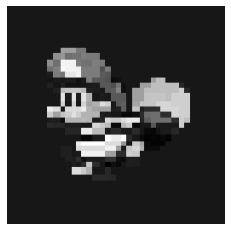

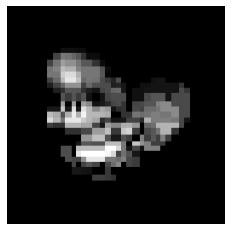

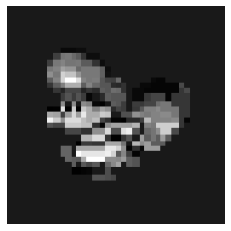

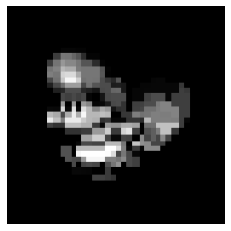

In [15]:
print_animation_SVD(G, m, shape)

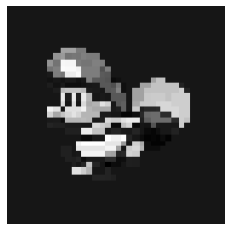

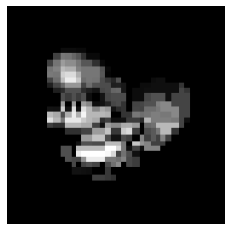

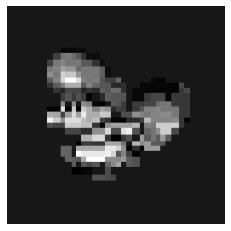

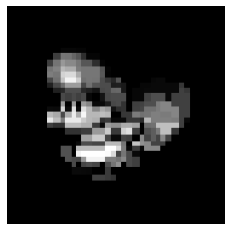

In [16]:
print_animation_PCA(G, m, shape)

In [17]:
print(SVD_size(G, m))
print(PCA_size(G,m))

1.048656
1.048672


In [18]:
print(compression_error_SVD(G, m))
print(compression_error_PCA(G, m))

12969.508393838814
12951.862870142406


# Referencias

Pdf entregado